In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv(r"C:\Users\kabi1\Downloads\Human Resources.csv")

In [3]:
df

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state
0,00-0037846,Kimmy,Walczynski,06-04-91,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,1/20/2002,NaN,Cleveland,Ohio
1,00-0041533,Ignatius,Springett,6/29/1984,Male,White,Business Development,Business Analyst,Headquarters,04-08-19,NaN,Cleveland,Ohio
2,00-0045747,Corbie,Bittlestone,7/29/1989,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,10-12-10,NaN,Cleveland,Ohio
3,00-0055274,Baxy,Matton,9/14/1982,Female,White,Services,Service Tech,Headquarters,04-10-05,NaN,Cleveland,Ohio
4,00-0076100,Terrell,Suff,04-11-94,Female,Two or More Races,Product Management,Business Analyst,Remote,9/29/2010,2029-10-29 06:09:38 UTC,Flint,Michigan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22209,99-9797418,Dorella,Garvan,07-08-98,Female,Hispanic or Latino,Research and Development,Research Assistant I,Headquarters,02-08-12,NaN,Cleveland,Ohio
22210,99-9869877,Dasie,Thorsby,4/19/2001,Female,Two or More Races,Services,Service Manager,Headquarters,10-06-17,NaN,Cleveland,Ohio
22211,99-9919822,Nerty,Wilding,02-09-70,Female,Two or More Races,Training,Junior Trainer,Headquarters,02-08-01,NaN,Cleveland,Ohio
22212,99-9960380,Mabelle,Dawks,09-02-85,Male,Two or More Races,Accounting,Staff Accountant I,Headquarters,04-03-05,2012-12-10 14:29:59 UTC,Cleveland,Ohio


In [13]:
def parse_date(date_str):
    try:
        return pd.to_datetime(date_str, dayfirst=True, errors='coerce')  # Handles mixed formats
    except:
        return pd.NaT

In [14]:
# Data Cleaning
# 1. Convert Dates
df['birthdate'] = df['birthdate'].apply(parse_date)
df['hire_date'] = pd.to_datetime(df['hire_date'], errors='coerce')
df['termdate'] = pd.to_datetime(df['termdate'].fillna(pd.Timestamp.today().normalize()), errors='coerce')

In [15]:
df

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state,age
0,00-0037846,Kimmy,Walczynski,1991-06-04,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,2002-01-20,2025-03-21 15:08:23.584374,Cleveland,Ohio,33.0
1,00-0041533,Ignatius,Springett,1984-06-29,Male,White,Business Development,Business Analyst,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,40.0
2,00-0045747,Corbie,Bittlestone,1989-07-29,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,35.0
3,00-0055274,Baxy,Matton,1982-09-14,Female,White,Services,Service Tech,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,42.0
4,00-0076100,Terrell,Suff,1994-04-11,Female,Two or More Races,Product Management,Business Analyst,Remote,2010-09-29,NaT,Flint,Michigan,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22209,99-9797418,Dorella,Garvan,1998-07-08,Female,Hispanic or Latino,Research And Development,Research Assistant I,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,26.0
22210,99-9869877,Dasie,Thorsby,2001-04-19,Female,Two or More Races,Services,Service Manager,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,23.0
22211,99-9919822,Nerty,Wilding,2070-02-09,Female,Two or More Races,Training,Junior Trainer,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,-45.0
22212,99-9960380,Mabelle,Dawks,1985-09-02,Male,Two or More Races,Accounting,Staff Accountant I,Headquarters,NaT,NaT,Cleveland,Ohio,39.0


In [16]:
# 3. Standardize Text Data
df['department'] = df['department'].str.strip().str.title()
df['location_city'] = df['location_city'].str.strip().str.title()

# 4. Handle Outliers in Age Data
df['age'] = (pd.Timestamp.today() - df['birthdate']).dt.days // 365
df.loc[df['age'] > 100, 'age'] = None

# 5. Create Tenure Column
valid_dates = df[['termdate', 'hire_date']].notna().all(axis=1)
df.loc[valid_dates, 'tenure_years'] = ((df['termdate'] - df['hire_date']).dt.days) / 365

In [17]:
df

,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state,age,tenure_years
0,00-0037846,Kimmy,Walczynski,1991-06-04,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,2002-01-20,2025-03-21 15:08:23.584374,Cleveland,Ohio,33.0,23.180822
1,00-0041533,Ignatius,Springett,1984-06-29,Male,White,Business Development,Business Analyst,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,40.0,NaN
2,00-0045747,Corbie,Bittlestone,1989-07-29,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,35.0,NaN
3,00-0055274,Baxy,Matton,1982-09-14,Female,White,Services,Service Tech,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,42.0,NaN
4,00-0076100,Terrell,Suff,1994-04-11,Female,Two or More Races,Product Management,Business Analyst,Remote,2010-09-29,NaT,Flint,Michigan,30.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22209,99-9797418,Dorella,Garvan,1998-07-08,Female,Hispanic or Latino,Research And Development,Research Assistant I,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,26.0,NaN
22210,99-9869877,Dasie,Thorsby,2001-04-19,Female,Two or More Races,Services,Service Manager,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,23.0,NaN
22211,99-9919822,Nerty,Wilding,2070-02-09,Female,Two or More Races,Training,Junior Trainer,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,-45.0,NaN
22212,99-9960380,Mabelle,Dawks,1985-09-02,Male,Two or More Races,Accounting,Staff Accountant I,Headquarters,NaT,NaT,Cleveland,Ohio,39.0,NaN


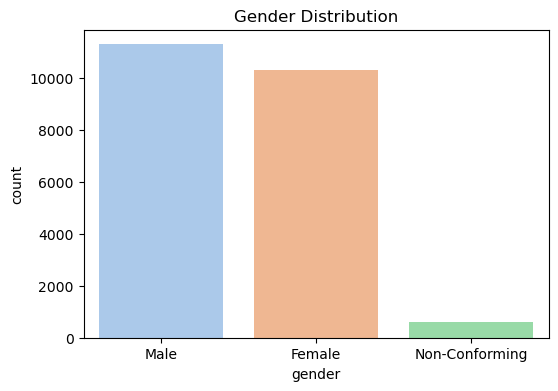

In [18]:
# Visualization 1: Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', palette='pastel')
plt.title('Gender Distribution')
plt.show()



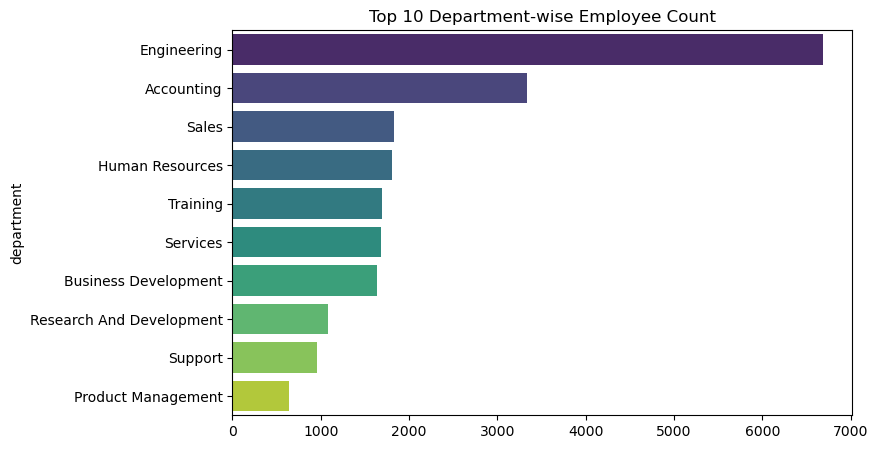

In [19]:
# Visualization 2: Department-wise Distribution
plt.figure(figsize=(8, 5))
department_counts = df['department'].value_counts().head(10)
sns.barplot(x=department_counts.values, y=department_counts.index, palette='viridis')
plt.title('Top 10 Department-wise Employee Count')
plt.show()



D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


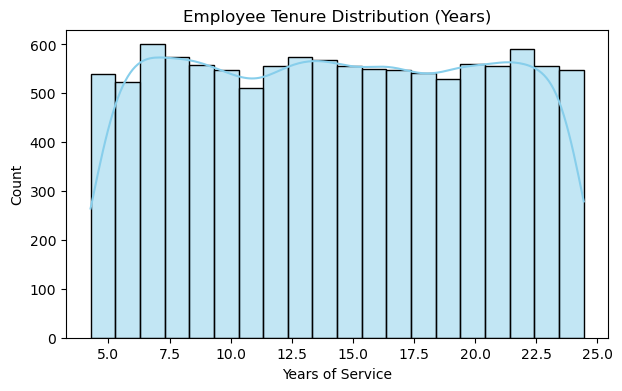

In [20]:
# Visualization 3: Tenure Analysis
plt.figure(figsize=(7, 4))
sns.histplot(df['tenure_years'].dropna(), bins=20, kde=True, color='skyblue')
plt.title('Employee Tenure Distribution (Years)')
plt.xlabel('Years of Service')
plt.show()



D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


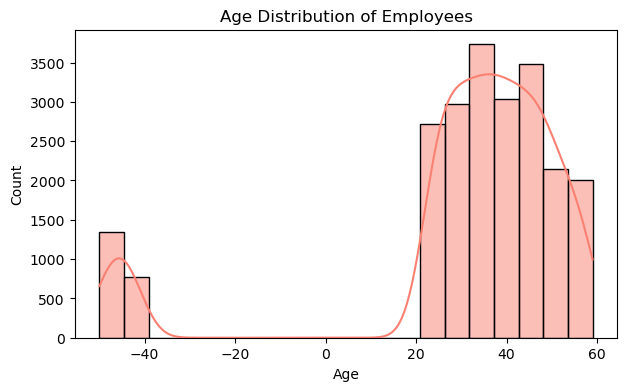

In [21]:
# Visualization 4: Age Distribution
plt.figure(figsize=(7, 4))
sns.histplot(df['age'].dropna(), bins=20, kde=True, color='salmon')
plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.show()



In [22]:
# Key Insights Table
key_insights = pd.DataFrame({
    'Total Employees': [df.shape[0]],
    'Average Tenure (Years)': [round(df['tenure_years'].mean(), 1)],
    'Average Age': [round(df['age'].mean(), 1)],
    'Gender Ratio (M/F)': [f"{(df['gender'] == 'Male').sum()} / {(df['gender'] == 'Female').sum()}"]
})
display(key_insights)

,Total Employees,Average Tenure (Years),Average Age,Gender Ratio (M/F)
0,22214,14.4,30.9,11288 / 10321


In [23]:
# Export the cleaned data for Power BI
df.to_csv('cleanData.csv', index=False)


In [24]:
df


,id,first_name,last_name,birthdate,gender,race,department,jobtitle,location,hire_date,termdate,location_city,location_state,age,tenure_years
0,00-0037846,Kimmy,Walczynski,1991-06-04,Male,Hispanic or Latino,Engineering,Programmer Analyst I,Headquarters,2002-01-20,2025-03-21 15:08:23.584374,Cleveland,Ohio,33.0,23.180822
1,00-0041533,Ignatius,Springett,1984-06-29,Male,White,Business Development,Business Analyst,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,40.0,NaN
2,00-0045747,Corbie,Bittlestone,1989-07-29,Male,Black or African American,Sales,Solutions Engineer Manager,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,35.0,NaN
3,00-0055274,Baxy,Matton,1982-09-14,Female,White,Services,Service Tech,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,42.0,NaN
4,00-0076100,Terrell,Suff,1994-04-11,Female,Two or More Races,Product Management,Business Analyst,Remote,2010-09-29,NaT,Flint,Michigan,30.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22209,99-9797418,Dorella,Garvan,1998-07-08,Female,Hispanic or Latino,Research And Development,Research Assistant I,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,26.0,NaN
22210,99-9869877,Dasie,Thorsby,2001-04-19,Female,Two or More Races,Services,Service Manager,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,23.0,NaN
22211,99-9919822,Nerty,Wilding,2070-02-09,Female,Two or More Races,Training,Junior Trainer,Headquarters,NaT,2025-03-21 15:08:23.584374,Cleveland,Ohio,-45.0,NaN
22212,99-9960380,Mabelle,Dawks,1985-09-02,Male,Two or More Races,Accounting,Staff Accountant I,Headquarters,NaT,NaT,Cleveland,Ohio,39.0,NaN
